# Python project 

The purpose and goals with this report is to explore with functions and syntax in python, 

to find information in the data and to learn the fundamental basics infrastructures within python.

The analysis has conducted findings and insicts.


starting with the dependencies

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [45]:
df = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')

# Describe Data set 
when describing the dataset we get a summary and overview on the dataset and it's context

In [46]:
df.head(5)

,datetime,close,amount,ex_symbol
0,2021-02-04,173.26,354292.0,l_sgld
1,2021-02-03,177.79,26805.0,l_sgld
2,2021-02-02,177.91,21356.0,l_sgld
3,2021-02-01,180.30,38422.0,l_sgld
4,2021-01-29,179.91,102532.0,l_sgld


In [47]:
df.describe()

,close,amount
count,11968.000000,1.196800e+04
mean,253.108282,1.041352e+05
std,385.863657,4.346516e+05
min,21.260000,1.000000e+00
25%,119.560000,3.008250e+03
50%,126.345000,1.163700e+04
75%,155.030000,5.586175e+04
max,1959.000000,1.708597e+07


In [48]:
df.index

RangeIndex(start=0, stop=11968, step=1)

In [49]:
df.set_index('ex_symbol')

,datetime,close,amount
ex_symbol,,,
l_sgld,2021-02-04,173.26,354292.0
l_sgld,2021-02-03,177.79,26805.0
l_sgld,2021-02-02,177.91,21356.0
l_sgld,2021-02-01,180.30,38422.0
l_sgld,2021-01-29,179.91,102532.0
...,...,...,...
s_zgldus,2016-01-08,1072.90,1862.0
s_zgldus,2016-01-07,1076.09,12058.0
s_zgldus,2016-01-06,1060.15,4357.0


# Exchange Traded Fund
We can find information about the diffrent etf's and it's values

In [50]:
df['ex_symbol'].head()

0    l_sgld
1    l_sgld
2    l_sgld
3    l_sgld
4    l_sgld
Name: ex_symbol, dtype: object

In [52]:
df.dtypes

datetime      object
close        float64
amount       float64
ex_symbol     object
dtype: object

In [53]:
df['ex_symbol'].unique()

array(['l_sgld', 's_sgld', 'l_igln', 'l_xgld', 's_xgld', 'l_gbsx',
       'l_phau', 's_csgold', 'l_sgbs', 's_zgldus'], dtype=object)

In [54]:
df['ex_symbol'].nunique()

10

In [55]:
df["ex_symbol"].describe()

count      11968
unique        10
top       l_xgld
freq        1289
Name: ex_symbol, dtype: object

In [56]:
df["ex_symbol"].value_counts()

l_xgld      1289
l_igln      1289
l_gbsx      1289
l_phau      1289
l_sgld      1289
l_sgbs      1280
s_zgldus    1279
s_csgold    1279
s_sgld      1005
s_xgld       680
Name: ex_symbol, dtype: int64

In [57]:
exsymbol_df = pd.DataFrame( {     
"exsymbol" : ['l_gbsx', 'l_xgld', 'l_igln', 'l_sgld', 'l_phau', 'l_sgbs', 's_csgold', 's_zgldus', 's_sgld', 's_xgld'] ,
"value" : [1289, 1289, 1289, 1289, 1289, 1280, 1279, 1279, 1005, 680]
})
exsymbol_df.head()

,exsymbol,value
0,l_gbsx,1289
1,l_xgld,1289
2,l_igln,1289
3,l_sgld,1289
4,l_phau,1289


In [58]:
df.groupby(['ex_symbol','datetime']).mean().unstack(0)

close                                                          \
ex_symbol   l_gbsx l_igln  l_phau  l_sgbs  l_sgld  l_xgld s_csgold  s_sgld   
datetime                                                                     
2016-01-04  102.54  21.26  103.78  105.05  105.53  105.82   105.54  105.91   
2016-01-05  102.82  21.32  104.23  105.32  105.81  106.08   105.43  105.65   
2016-01-06  103.97  21.55  105.45  106.52  107.06  107.29   106.63  106.80   
2016-01-07  105.51  21.87  106.93  108.09  108.57  108.86   108.27  108.39   
2016-01-08  105.29  21.83  106.73  107.88  108.36  108.64   107.90  108.23   
...            ...    ...     ...     ...     ...     ...      ...     ...   
2021-01-29  173.39  36.29  175.98  179.01  179.91  180.31   179.44  179.92   
2021-02-01  173.89  36.35  176.55  179.53  180.30  180.58   180.00  180.14   
2021-02-02  171.48  35.89  174.06  177.19  177.91  178.22   177.64  177.90   
2021-02-03  171.33  35.89  173.93  176.86  177.79  178.32   177.40  177.34   
2021-02-04  166.91  34.95  169.52  172.31  173.26  173.56   172.64  173.26   

                               amount                                         \
ex_symbol   s_xgld s_zgldus    l_gbsx    l_igln   l_phau   l_sgbs     l_sgld   
datetime                                                                       
2016-01-04  105.86  1048.21   35927.0   48848.0  33808.0   1567.0    24000.0   
2016-01-05     NaN  1046.98   33608.0    9965.0  36818.0  10031.0    83773.0   
2016-01-06     NaN  1060.15   64732.0   46331.0  64272.0  18042.0  1111497.0   
2016-01-07     NaN  1076.09   98517.0   32573.0  76768.0   3894.0  1777423.0   
2016-01-08  107.46  1072.90  126175.0   11128.0  26347.0  53428.0   137534.0   
...            ...      ...       ...       ...      ...      ...        ...   
2021-01-29  179.70  1767.80   21223.0  597622.0  32265.0   9106.0   102532.0   
2021-02-01  181.18  1770.60    7814.0  489657.0  27440.0   3394.0    38422.0   
2021-02-02  177.74  1751.00   18496.0  170826.0  17446.0   7886.0    21356.0   
2021-02-03     NaN  1748.20    9872.0  257208.0  21328.0   1895.0    26805.0   
2021-02-04  173.56  1703.60   23698.0  823755.0  36196.0  20074.0   354292.0   

                                                        
ex_symbol    l_xgld s_csgold   s_sgld  s_xgld s_zgldus  
datetime                                                
2016-01-04   4897.0   4263.0   8163.0  2000.0    542.0  
2016-01-05   3206.0   1110.0   8000.0     NaN   2986.0  
2016-01-06   7774.0   6468.0  33995.0     NaN   4357.0  
2016-01-07    166.0   2941.0  11758.0     NaN  12058.0  
2016-01-08   3284.0   7154.0   6487.0   600.0   1862.0  
...             ...      ...      ...     ...      ...  
2021-01-29   4480.0  13010.0  14462.0    76.0   6620.0  
2021-02-01   7522.0  15816.0  18959.0   526.0   2723.0  
2021-02-02   3892.0   3675.0  12561.0   190.0   1688.0  
2021-02-03   2274.0   2783.0  11332.0     NaN   1421.0  
2021-02-04  13199.0   2963.0  18542.0  4200.0   4301.0  

[1305 rows x 20 columns]

# matplotlib
Here we get an view on the amount and close during the time interval

In [64]:
df['datetime'] = pd.to_datetime(df['datetime'])

<AxesSubplot:xlabel='datetime'>

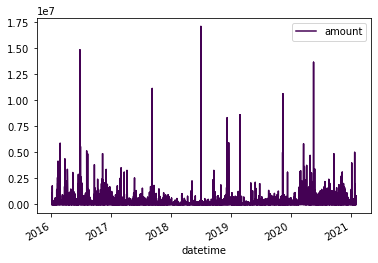

In [65]:
df.plot.line(x='datetime', y='amount', colormap='viridis', grid=False)

<AxesSubplot:xlabel='datetime'>

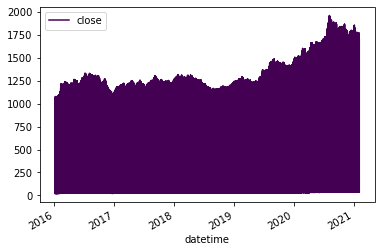

In [66]:
df.plot.line(x='datetime', y='close', colormap='viridis', grid=False)

# 
mean and standard diviation for amount in the normal distribution

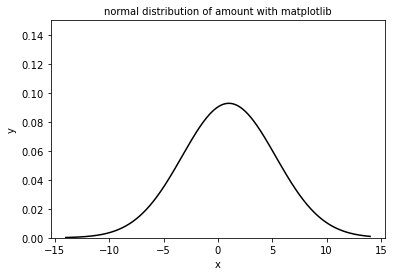

In [67]:
x_min = 1.0
x_max = 1.7

mean = 1.0
std = 4.3

x = np.arange(-14, 14, 0.0014)

y = scipy.stats.norm.pdf(x,mean,std)

plt.ylim(0,0.15)

plt.title('normal distribution of amount with matplotlib',fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("normal.png")
plt.plot(x,y, color='black')